# Field methods in remote sensing: Modelling of leaf spectra

- **Prerequisites:** You should have access to the data collected in the field and in the laboratory.


## Aims of the practical session

The aim of this practice is to become familiar with the methods and analytical tools needed to parameterize a physical model (Prospect 4) to simulate leaf spectra and compare that simulated spectra to a spectrum measured in the field. We will then invert the physical model using the spectrum measured in the field to retrieve the parameter `N`, which is the only parameter not measured in the field.

For this activity, we will use the web interface for PROSPECT-5 which is a software program that simulates directional–hemispherical reflectance and transmittance from live and senesced leaves over the 400 nm to 2500 nm range of the electromagnetic spectrum (Jacquemoud & Baret, 1990). PROSPECT-5 uses two main inputs: the leaf structure parameter ``N` (which is the number of compact layers specifying the average number of air/cell walls interfaces within the mesophyll), and the amount of photosynthedic pigments (Fourty et al., 1996, Jacquemoud et al., 1996 and Jacquemoud et al., 2000). 

The absorption of light by photosynthetic pigments which predominates in the visible (VIS) spectrum was long assumed to be entirely caused by chlorophylls, although carotenoids and anthocyanins may also be significant. The absorption of light by water and the leaf structural components (e.g. cellulose and lignin) affects the near infrared (NIR) and short-wave infrared (SWIR) regions of the spectrum. 


## Description

To achieve the aims above, 

First we will:
- Use the online inteface of PROSPECT to simulate leaf spectra with different characteristics,
    - Simulate leaf spectra changing a single biochemical component,
    - Simulate leaf spectra changing all components at once.

Second, we will:
- Compare the simulated spectra with the spectra collected in the field.

Let's do it!

***

## Modelling leaf spectra

For this section we’ll use the online PROSPECT interface. To do that follow this link and you’ll find a web interface similar to the one below.
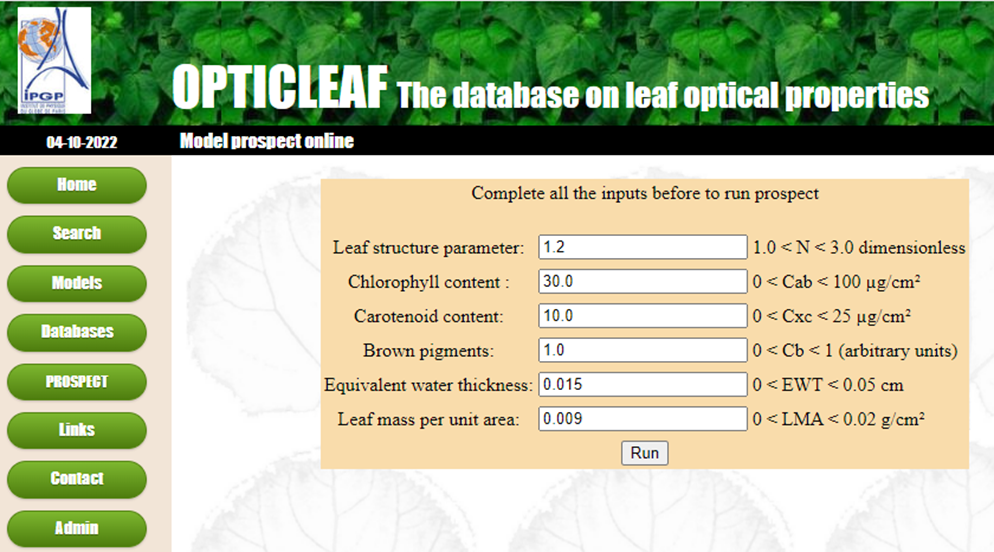

Use the data you collected in the lab to fill in the table.


To create different models of leaf reflectance and absorption you’ll need to follow these steps:

- Collect all the spectra sampled during the field day at the Arboretum. These data should be in a ``*.CSV` file.
- Collect all the data from the laboratory analyses. This includes Water content, Mass, and Chlorophylls. 
- If you haven’t calculated them yet, use the equations below to calculate the following variables:

1. Chlorophyll a (Ca), chlorophyll b (Cb), and total carotenoids (Cx+c) (Sumanta et al., 2014), where A is the absorption coefficient for each band.Total chlorophyll content is the sum of Ca and Cb. 

$$C_{a}(\frac{ug}{ml}) = 13.36 A_{(664)} -5.19 A_{(649)}$$

$$C_{b}(\frac{ug}{ml}) = 27.43 A_{(649)} -8.12 A_{(664)}$$

$$C_{x+c}(\frac{ug}{ml}) = \frac{1000 A_{(470)} -2.13 C_{a} - 97.63 C_{b}}{209}$$

2. Fuel Moisture Content (FMC):
$$FMC = \frac{Weight_{(fresh)} - Weight_{(dry)}}{Weight_{(dry)}} * 100$$



3. Equivalent water thickness (EWT):
$$EWT=\frac{Weight_{(fresh)} - Weight_{(dry)}}{Leaf surface area}$$



4. Leaf Mass per unit Area (LMA):
$$LMA=\frac{Weight_{(dry)}}{Leaf Surface Area}$$


Once you have collected all the laboratory and field data you can navigate to the prospect site using this link http://opticleaf.ipgp.fr/index.php?page=prospect. 

**Note** that some browser extensions may break the site. If the site is not working, try disabling some/all browser extensions and try again. 

Now that you have all the data, it’s time to create some models! You’ll create one model at a time by varying one parameter at a time. That is, you’ll only change the Chlorophyll content, then change the Equivalent Water Thickness, and so on. 

-	**First use only the samples that you collected**. Afterwards you can use the combined samples.
-	Input one Chlorophyll value into the box and hit ‘run’ 


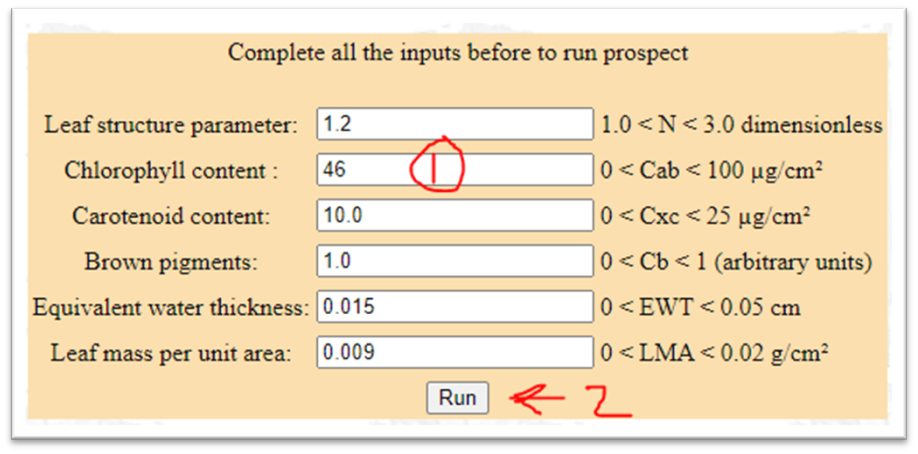

The website will then show you a graph of reflectance and 1-Transmitance (i.e. absorption). Now you can download the data into a _*.txt_ file, which you can use for further analysis 

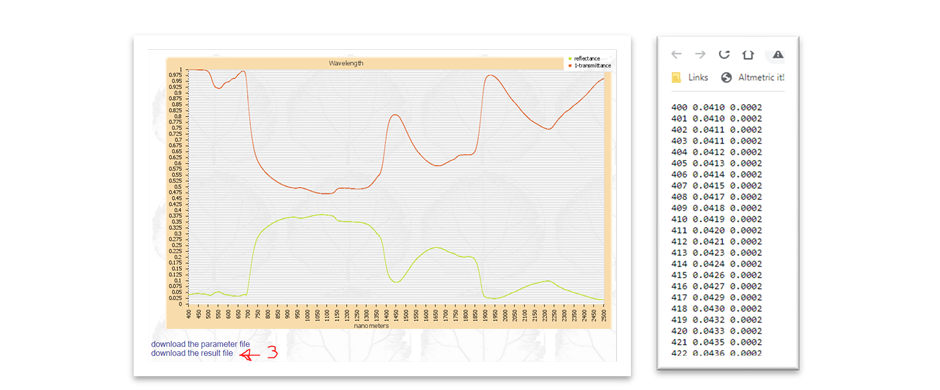

When you click on the **‘Download the result file’** button, you’ll be directed to a new window with three columns


<div class="alert alert-block alert-danger">
Now Stop!
</div>    

Before you save any data let’s understand what is the output from PROSPECT. 


- The PROSPECT version we’re using will output a file with three columns. 
    - Column 1 is the wavelength (400-250nm), 
    - Column 2 is the simulated reflectance (0-1), and 
    - Column 3 is the absorbed light (i.e. 1-Transmittance, 0-1).


- For this practical we’ll use the Wavelength and Reflectance columns (i.e. columns 1 and 2). 


Let’s go back to the window with three columns. Here, you’ll need to ‘right click’ and ‘save as’ to actually download the data. We recommend saving the file with the parameter you’ve changed so you know which file corresponds to which parameter.

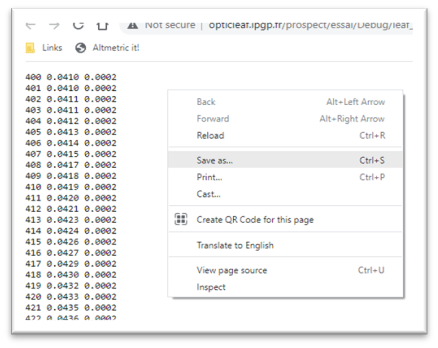

Repeat this procedure for the parameters you calculated from **your samples**.  In other words, if you collected samples from one (1) tree, you should repeat this procedure four times (i.e. for Chlorophyll, Carotenoid content, Equivalent water thickness, and Leaf mass per unit area). If you collected leaf samples from five (5) trees, then you should do this 20 times. 

Now let's create some plots and see the difference it makes to have more or less of each component.

## Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Load the data

Here, we'll load all the text files you created into a single dataframe and plot them.
You can plot each one separately if you like.

In [2]:
# Change the folder path to whereever you saved the spectra from PROSPECT
folder = 'simulated/' 

# Find all `*.TXT` files in the directory or folder
file_list = [folder+file for file in os.listdir(folder) if file.endswith('.txt')]

# Print the number of `*.txt` files in the folder
print('there are ', len(file_list), ' *.txt files in ', folder)

there are  5  *.txt files in  simulated/


Load the first file and see what it looks like

Loop through remaining dataframes and load data

In [3]:
dfs=[]
for i in range(0,len(file_list)):
    data = pd.read_fwf(file_list[i], sep=' ',widths=[4,7,7], 
                  header=None, 
                  names=["Wavelength", "Reflectance", "Transmittance"]
                      ).drop(['Transmittance'], axis=1)
    data.set_index('Wavelength', inplace=True)
    dfs.append(data)
    # print(data)

main_dataframe = pd.concat(dfs, axis = 1)

# drop the ASD columns that have all-NaNs  
main_dataframe = main_dataframe.dropna(axis=1, how='all')
main_dataframe

,Reflectance,Reflectance,Reflectance,Reflectance,Reflectance
Wavelength,,,,,
400,0.0410,0.0410,0.0410,0.0410,0.0410
401,0.0410,0.0410,0.0410,0.0410,0.0410
402,0.0411,0.0411,0.0411,0.0411,0.0411
403,0.0411,0.0411,0.0411,0.0411,0.0411
404,0.0412,0.0412,0.0412,0.0412,0.0412
...,...,...,...,...,...
2496,0.0189,0.0189,0.0189,0.0189,0.0189
2497,0.0188,0.0188,0.0188,0.0188,0.0188
2498,0.0188,0.0188,0.0188,0.0188,0.0188


> Note that all of the columns are named 'Reflectance'. You need to keep track of which file corresponds to each PROSPECT simulation.  Consider creating different folders for differnt models. For example, one folder named *chloro* for all the chlorophyll models, and one folder named *ewt* for all the EWT models, etc.  You'll need to adjust the code accordingly.


## Plotting the simulated spectra

We recommend creating a plot for each individual parameters, and then combine all simulated spectra into one plot.

Use the following cell as a guide for plotting the simulated spectra.

<AxesSubplot:title={'center':'Simulated leaf spectra using PROSPECT'}, xlabel='Wavelength'>

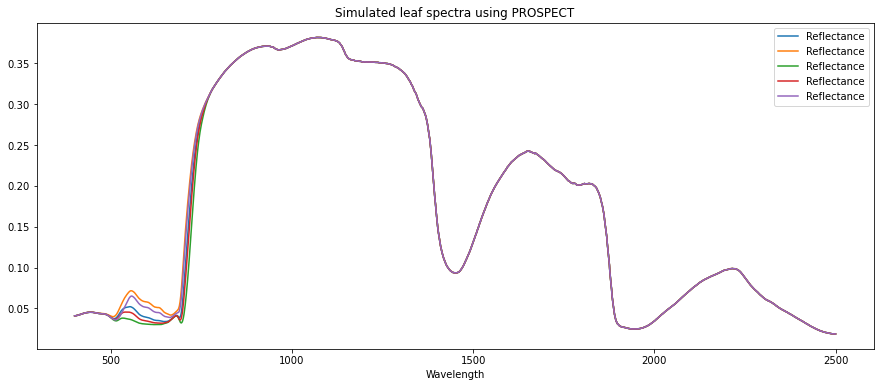

In [4]:
main_dataframe.plot.line(figsize=(15,6),
                        title = 'Simulated leaf spectra using PROSPECT')

<div class="alert alert-block alert-danger">
    Exercise 1: make a plot for the simulated spectra
    
- Describe the effect of changing each biochemical compound on the simulated spectra.
- Describe the Wavelength range that is affected by each biochemical compound.
</div>  

Your answer goes here:



.

Up to now, you only shoul've changed a single parameter in each simulation. 

Now change all the parameters, that is, for each sample you collected in the Arboretum, you should have a value for: Chlorophyll content, then change the Equivalent Water Thickness. Use all of them at once to create a realistic simulation of the leaf spectra your sample.

Plot these spectra as well.

In [5]:
# load the new simulated spectra



In [6]:
# Merge the datasets



In [7]:
# Plot the simulated spectra



## Load the measured spectra

When you measured the spectra in the field and/or in the laboratory, you should have exported it into a *.CSV* or *.TXT* file.

We'll now load the measured spectra, plot it, and compare it with the simulated spectra. 
The spectra well collected by Jackson Taylor as part of his honours project. 

In [8]:
# Lets read the first file and see what it looks like
# remember to change the names of the files you're using.
measured_spectra1 = pd.read_csv('measured/MAC_ARB_098_044_210422_L00001.asd.txt',
                                      sep='\t',)

measured_spectra2 = pd.read_csv('measured/MAC_ARB_098_xx4_310321_L00001.asd.txt',
                               sep='\t')

measured_spectra1.set_index('Wavelength', inplace=True)
measured_spectra2.set_index('Wavelength', inplace=True)

measured_spectra1.head()

,MAC_ARB_098_044_210422_L00001.asd
Wavelength,
350,0.610726
351,0.480991
352,-0.188762
353,-0.242855
354,0.072172


Text(0.5, 1.0, 'Measured leaf spectra using the ASD')

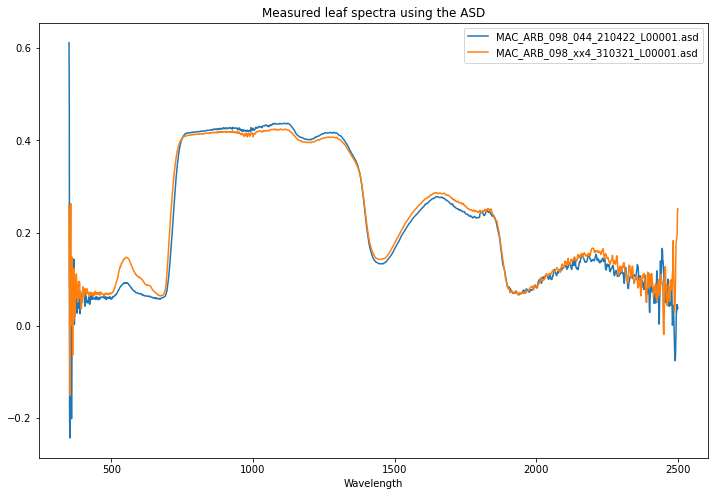

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
measured_spectra1.plot.line(ax=ax)
measured_spectra2.plot.line(ax=ax)
plt.title('Measured leaf spectra using the ASD')

<div class="alert alert-block alert-danger">
    Exercise 2: compare the simulated spectra with the real spectra
    
- Describe the main differences between the measured and the simulated spectra.
- Where do the spectra differ the most? What do you think the main causes of discrepancy between the spectra can be?
- What do you think is the effect of the *Leaf structure parameter: N* on the spectra? Remember that you didn't change this parameter to create your simulations.  

</div>  

In [10]:
# Plot the simulated and the measured spectra



## References

Jacquemoud, S., and Ustin, S. (2019). Leaf optical properties. Cambridge University Press.

Feret, J.B., Francois, C., Asner, G.P., Gitelson, A.A., Martin, R.E., Bidel, L.P.R., Ustin, S.L., le Maire, G., Jacquemoud, S. (2008), PROSPECT-4 and 5: Advances in the leaf optical properties model separating photosynthetic pigments. Remote Sens. Environ. 112, 3030-3043.

Allen W.A., Gausman H.W., Richardson A.J., Thomas J.R. (1969), Interaction of isotropic ligth with a compact plant leaf, Journal of the Optical Society of American, 59:1376-1379.

Stokes G.G. (1862), On the intensity of the light reflected from or transmitted through a pile of plates, Proceedings of the Royal Society of London, 11:545-556.

Ritchie, R. J. (2006) ‘Consistent sets of spectrophotometric chlorophyll equations for acetone, methanol and ethanol solvents’, Photosynthesis Research, 89(1), pp. 27–41. doi: 10.1007/s11120-006-9065-9.

Sumanta, N. et al. (2014) ‘Spectrophotometric Analysis of Chlorophylls and Carotenoids from Commonly Grown Fern Species by Using Various Extracting Solvents’, Research Journal of Chemical Sciences Res. J. Chem. Sci, 4(9), pp. 2231–606.


***
## Additional information

**License:** The code in this notebook was modified by Nicolas Younes.
The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle site 

**Last modified:** September 2022